Loaded JADE data for small scenario: 463 records
Loaded SPADE data for small scenario: 463 records
Loaded JADE data for medium scenario: 5211 records
Loaded SPADE data for medium scenario: 5308 records
Loaded JADE data for full scenario: 20022 records
Loaded SPADE data for full scenario: 20149 records
Combined dataset has 51616 records across all scenarios

RTT-FOCUSED ANALYSIS FOR JADE vs SPADE


<Figure size 1000x600 with 0 Axes>

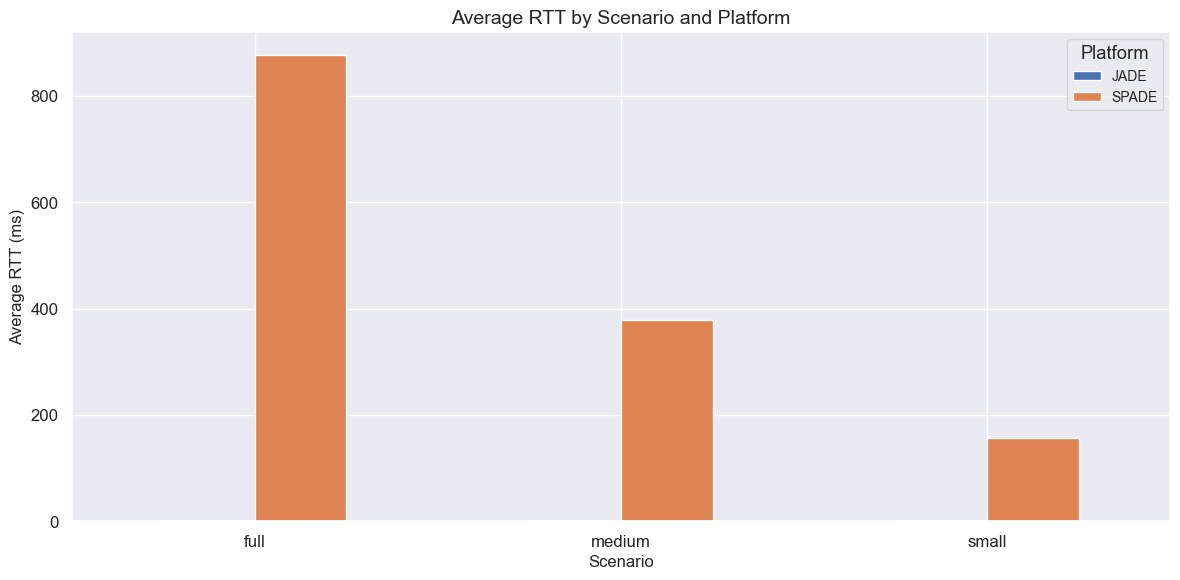


Average RTT by Scenario and Platform (ms):
Platform  JADE   SPADE
Scenario              
full      0.73  876.66
medium    0.53  377.98
small     1.17  156.54


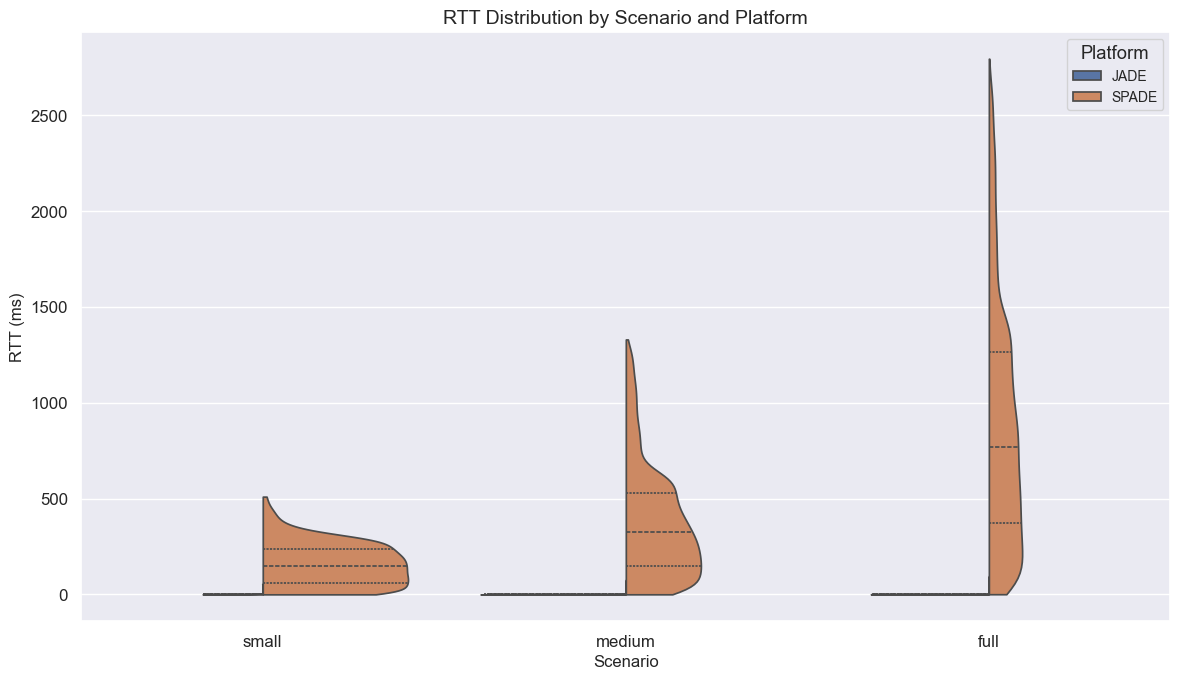

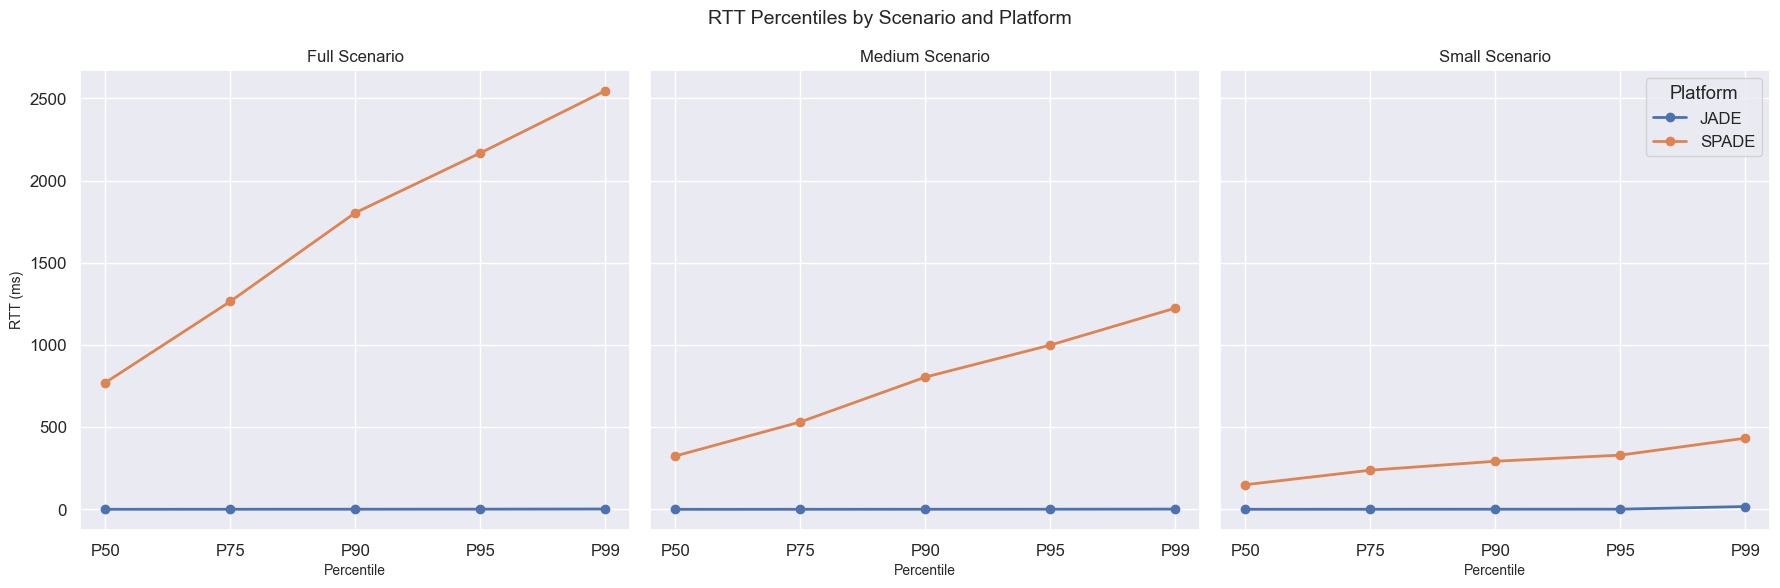


RTT Percentiles by Scenario and Platform (ms):
Platform              JADE    SPADE
Scenario Percentile                
full     P50          0.53   770.80
         P75          0.75  1265.22
         P90          1.07  1804.75
         P95          1.38  2168.47
         P99          2.41  2547.08
medium   P50          0.36   324.47
         P75          0.54   531.86
         P90          0.77   804.73
         P95          1.03   999.64
         P99          1.77  1224.84
small    P50          0.53   150.05
         P75          0.74   238.27
         P90          1.08   292.86
         P95          1.30   330.09
         P99         17.35   433.32


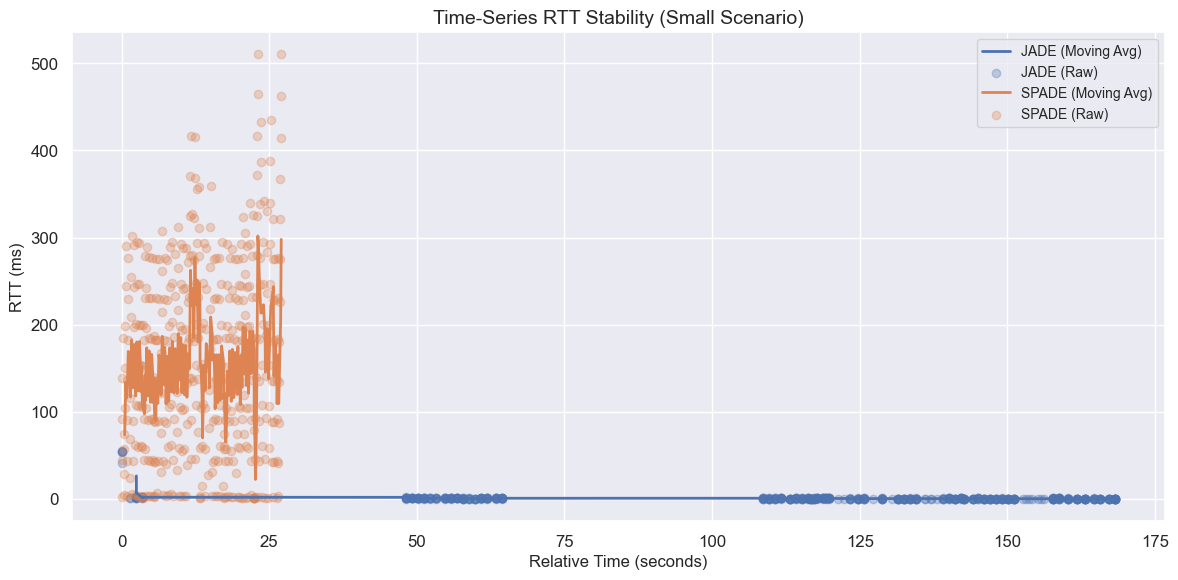

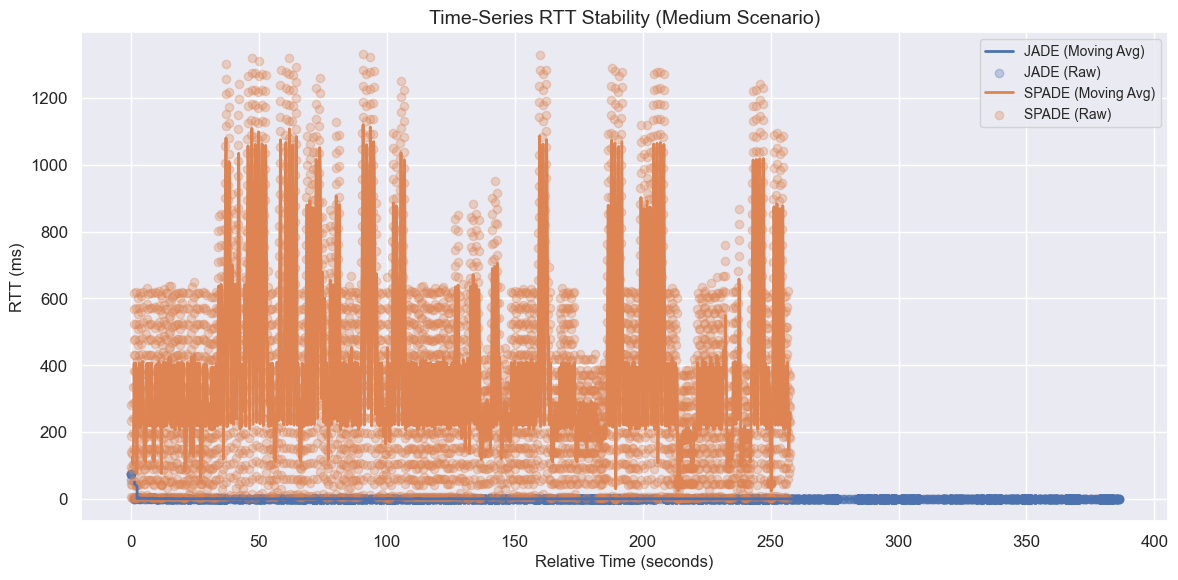

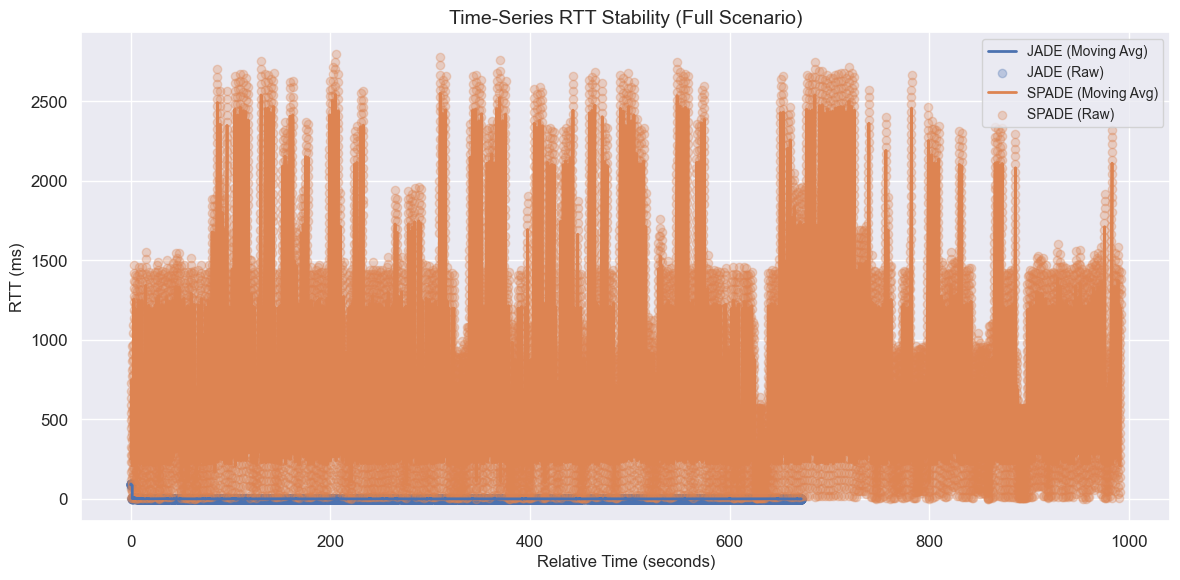

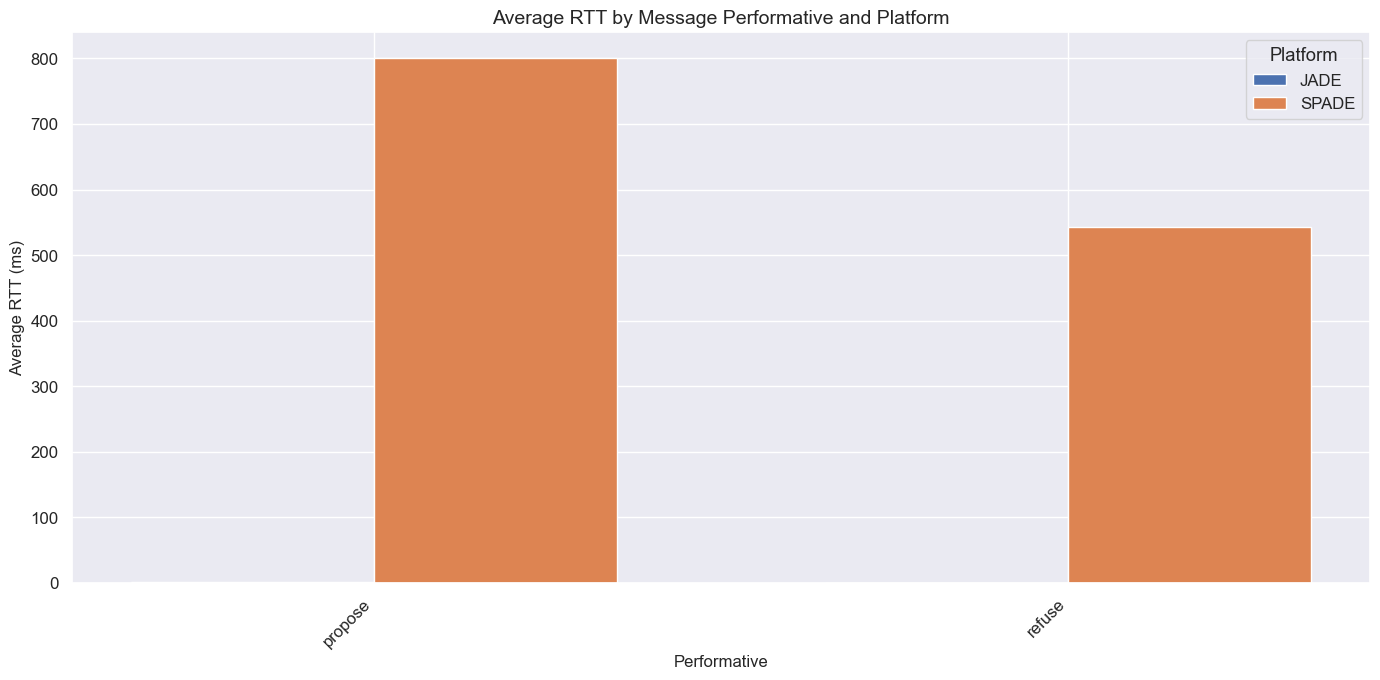


Average RTT by Performative and Platform (ms):
Platform      JADE   SPADE
Performative              
propose       0.77  800.34
refuse        0.33  543.34
Missing one or more required scenarios (small, medium, large)

RTT Performance Summary Table:
          Mean         Median           Min          Max          Std Dev           P95             P99           Count       
Platform  JADE   SPADE   JADE   SPADE  JADE SPADE   JADE    SPADE    JADE   SPADE  JADE    SPADE   JADE    SPADE   JADE  SPADE
Scenario                                                                                                                      
full      0.73  876.66   0.53  770.80  0.05  1.30  96.26  2795.31    2.91  627.19  1.38  2168.47   2.41  2547.08  20022  20149
medium    0.53  377.98   0.36  324.47  0.04  0.82  75.86  1330.59    2.66  292.16  1.03   999.64   1.77  1224.84   5211   5308
small     1.17  156.54   0.53  150.05  0.10  0.64  55.08   510.40    5.34  109.56  1.30   330.09  17.35   433.32   

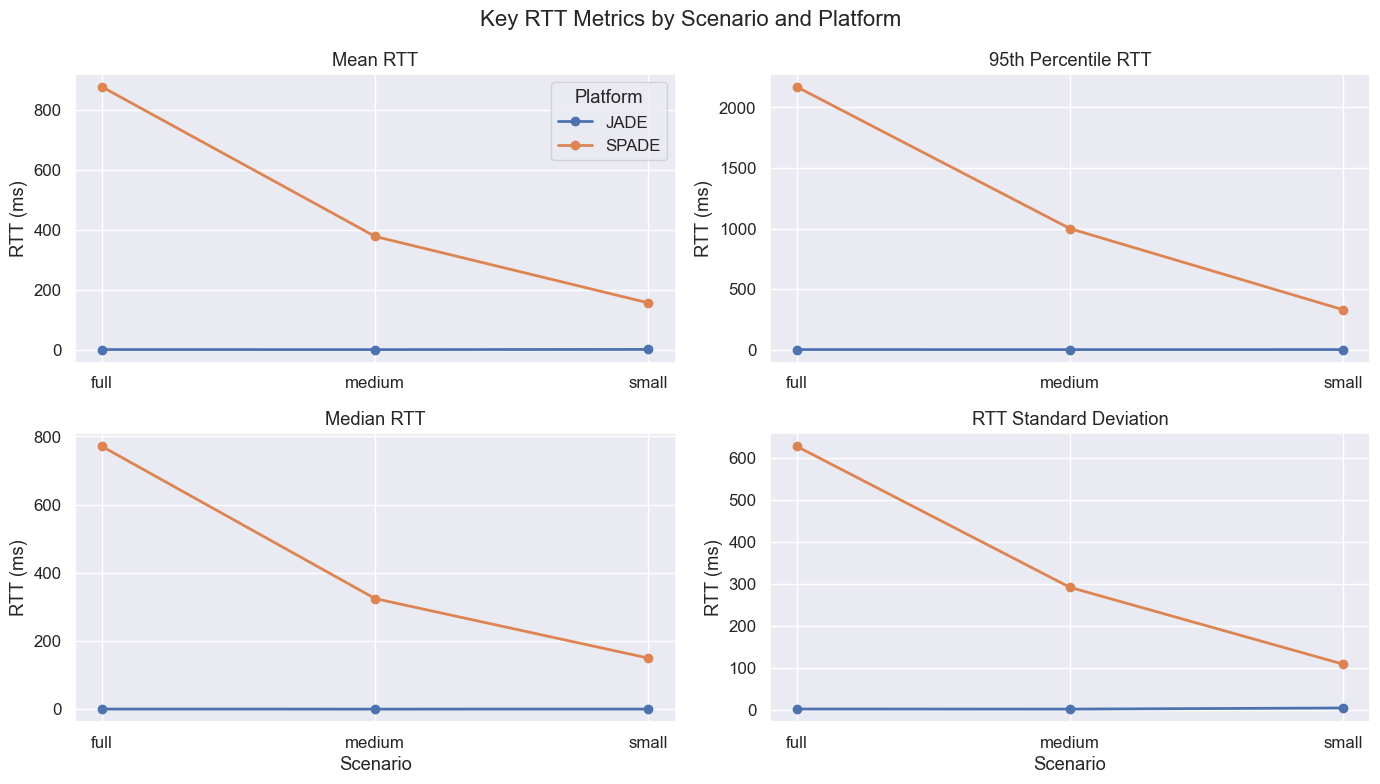


RTT PERFORMANCE CONCLUSION

RTT Performance Comparison (lower is better):
Platform  JADE   SPADE
Scenario              
full      0.73  876.66
medium    0.53  377.98
small     1.17  156.54

Full scenario:
  JADE performs better with average RTT of 0.73 ms
  99.9% faster than SPADE (876.66 ms)

Medium scenario:
  JADE performs better with average RTT of 0.53 ms
  99.9% faster than SPADE (377.98 ms)

Small scenario:
  JADE performs better with average RTT of 1.17 ms
  99.3% faster than SPADE (156.54 ms)

Overall RTT performance conclusion:
JADE shows better RTT performance in 3 out of 3 scenarios

Recommendation based on RTT performance:
- JADE is recommended for overall lower RTT across scenarios


In [2]:
# RTT-Focused MAS Platform Comparison: JADE vs SPADE
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

# Set the style for better visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

# Scenario definitions
scenarios = ['small', 'medium', 'full']
platforms = ['jade', 'spade']

# Create empty dictionaries to store dataframes
scenario_data = {}

# Load all scenario data
for scenario in scenarios:
    scenario_data[scenario] = {}
    for platform in platforms:
        file_path = f"rtt/{scenario}/{platform}.csv"
        try:
            # Load data with handling for different encodings and formats
            df = pd.read_csv(file_path, encoding="latin1")
            
            # Add platform and scenario identifiers
            df['Platform'] = platform.upper()
            df['Scenario'] = scenario
            
            # Process data based on platform specifics
            if platform.lower() == 'jade':
                # Convert JADE RTT format (comma decimal separator to period)
                df['RTT_ms'] = df['RTT_ms'].str.replace(',', '.').astype(float)
                # Normalize JADE performatives to lowercase (as noted in your comment)
                df['Performative'] = df['Performative'].str.lower()
            
            # Convert timestamps to datetime objects
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])
            
            # Store in the dictionary
            scenario_data[scenario][platform] = df
            print(f"Loaded {platform.upper()} data for {scenario} scenario: {len(df)} records")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            # Create empty dataframe to prevent errors
            scenario_data[scenario][platform] = pd.DataFrame()

# Function to combine data for a specific scenario
def get_combined_data(scenario):
    dfs = []
    for platform in platforms:
        if not scenario_data[scenario][platform].empty:
            dfs.append(scenario_data[scenario][platform])
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    return pd.DataFrame()

# Combine all data for cross-scenario analysis
all_data = []
for scenario in scenarios:
    for platform in platforms:
        if not scenario_data[scenario][platform].empty:
            all_data.append(scenario_data[scenario][platform])

if all_data:
    all_combined_df = pd.concat(all_data, ignore_index=True)
    print(f"Combined dataset has {len(all_combined_df)} records across all scenarios")
else:
    all_combined_df = pd.DataFrame()
    print("No data could be loaded")

# ===== RTT VISUALIZATION FUNCTIONS =====

def visualize_rtt_by_scenario():
    """
    Create a bar chart showing average RTT for each platform across scenarios
    """
    if all_combined_df.empty:
        print("No data available for visualization")
        return
    
    # Calculate mean RTT by platform and scenario
    rtt_means = all_combined_df.groupby(['Scenario', 'Platform'])['RTT_ms'].mean().reset_index()
    
    # Pivot for easier plotting
    rtt_pivot = rtt_means.pivot(index='Scenario', columns='Platform', values='RTT_ms')
    
    # Plot
    plt.figure(figsize=(10, 6))
    rtt_pivot.plot(kind='bar', rot=0)
    plt.title('Average RTT by Scenario and Platform', fontsize=14)
    plt.xlabel('Scenario', fontsize=12)
    plt.ylabel('Average RTT (ms)', fontsize=12)
    plt.legend(title='Platform', fontsize=10)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Print the actual values
    print("\nAverage RTT by Scenario and Platform (ms):")
    print(rtt_pivot.round(2))

def visualize_rtt_distribution():
    """
    Create violin plots to show the RTT distribution for each platform across scenarios
    """
    if all_combined_df.empty:
        print("No data available for visualization")
        return
    
    plt.figure(figsize=(12, 7))
    sns.violinplot(x='Scenario', y='RTT_ms', hue='Platform', data=all_combined_df, 
                  split=True, inner='quartile', cut=0)
    plt.title('RTT Distribution by Scenario and Platform', fontsize=14)
    plt.xlabel('Scenario', fontsize=12)
    plt.ylabel('RTT (ms)', fontsize=12)
    plt.legend(title='Platform', fontsize=10)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

def visualize_rtt_percentiles():
    """
    Create a line plot showing RTT percentiles for each platform across scenarios
    """
    if all_combined_df.empty:
        print("No data available for visualization")
        return
    
    # Calculate percentiles for each platform and scenario
    percentiles = [50, 75, 90, 95, 99]
    percentile_data = []
    
    for scenario in all_combined_df['Scenario'].unique():
        for platform in all_combined_df['Platform'].unique():
            platform_data = all_combined_df[(all_combined_df['Platform'] == platform) & 
                                         (all_combined_df['Scenario'] == scenario)]
            
            if not platform_data.empty:
                for p in percentiles:
                    percentile_data.append({
                        'Scenario': scenario,
                        'Platform': platform,
                        'Percentile': f'P{p}',
                        'RTT_ms': platform_data['RTT_ms'].quantile(p/100)
                    })
    
    if not percentile_data:
        print("No percentile data available")
        return
    
    percentile_df = pd.DataFrame(percentile_data)
    
    # Create subplots for each scenario
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    for i, scenario in enumerate(sorted(percentile_df['Scenario'].unique())):
        scenario_data = percentile_df[percentile_df['Scenario'] == scenario]
        
        # Get unique platforms
        for platform in scenario_data['Platform'].unique():
            platform_data = scenario_data[scenario_data['Platform'] == platform]
            axes[i].plot(platform_data['Percentile'], platform_data['RTT_ms'], 
                       marker='o', linewidth=2, label=platform)
        
        axes[i].set_title(f'{scenario.capitalize()} Scenario', fontsize=12)
        axes[i].set_xlabel('Percentile', fontsize=10)
        axes[i].grid(True)
        
        if i == 0:
            axes[i].set_ylabel('RTT (ms)', fontsize=10)
            
    plt.suptitle('RTT Percentiles by Scenario and Platform', fontsize=14)
    plt.legend(title='Platform')
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()
    
    # Print the actual values
    print("\nRTT Percentiles by Scenario and Platform (ms):")
    pivot = percentile_df.pivot_table(index=['Scenario', 'Percentile'], 
                                    columns='Platform', 
                                    values='RTT_ms')
    print(pivot.round(2))

def visualize_rtt_time_series(scenario='small'):
    """
    Create a time-series plot showing RTT stability over time for a specific scenario
    """
    scenario_df = get_combined_data(scenario)
    
    if scenario_df.empty:
        print(f"No data available for {scenario} scenario")
        return
    
    plt.figure(figsize=(12, 6))
    for platform, group in scenario_df.groupby('Platform'):
        if len(group) > 0:
            # Sort by timestamp
            group = group.sort_values('Timestamp')
            # Create relative time in seconds from first timestamp
            first_time = group['Timestamp'].min()
            relative_time = [(t - first_time).total_seconds() for t in group['Timestamp']]
            
            # Calculate rolling mean with window size of min(10, len(group)/3)
            window = max(3, min(10, len(group)//3))
            if len(group) > window:
                rolling_mean = group['RTT_ms'].rolling(window=window).mean()
                plt.plot(relative_time, rolling_mean, 
                        label=f'{platform} (Moving Avg)', linewidth=2)
            
            # Plot raw data with lower alpha
            plt.scatter(relative_time, group['RTT_ms'], 
                      alpha=0.3, label=f'{platform} (Raw)')
    
    plt.title(f'Time-Series RTT Stability ({scenario.capitalize()} Scenario)', fontsize=14)
    plt.xlabel('Relative Time (seconds)', fontsize=12)
    plt.ylabel('RTT (ms)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def visualize_rtt_by_performative():
    """
    Create a grouped bar chart showing average RTT by message performative for each platform
    """
    if all_combined_df.empty:
        print("No data available for visualization")
        return
    
    # Calculate mean RTT by platform and performative
    rtt_by_perf = all_combined_df.groupby(['Platform', 'Performative'])['RTT_ms'].agg(
        ['mean', 'count', 'std']
    ).reset_index()
    
    # Filter performatives with enough data points
    min_count = 5
    rtt_by_perf_filtered = rtt_by_perf[rtt_by_perf['count'] >= min_count]
    
    if rtt_by_perf_filtered.empty:
        print(f"No performatives with at least {min_count} data points")
        return
    
    # Create the plot
    plt.figure(figsize=(14, 7))
    
    # Get unique performatives
    performatives = sorted(rtt_by_perf_filtered['Performative'].unique())
    platforms = sorted(rtt_by_perf_filtered['Platform'].unique())
    
    # Set up the x positions for the bars
    x = np.arange(len(performatives))
    width = 0.35 if len(platforms) == 2 else 0.25
    
    # Create bars for each platform
    for i, platform in enumerate(platforms):
        platform_data = rtt_by_perf_filtered[rtt_by_perf_filtered['Platform'] == platform]
        # Create a dictionary for easy lookup
        platform_dict = dict(zip(platform_data['Performative'], platform_data['mean']))
        
        # Get values for each performative, using 0 if not present
        values = [platform_dict.get(perf, 0) for perf in performatives]
        
        # Calculate the position offset for this platform
        offset = width * (i - (len(platforms) - 1) / 2)
        
        plt.bar(x + offset, values, width, label=platform)
    
    plt.title('Average RTT by Message Performative and Platform', fontsize=14)
    plt.xlabel('Performative', fontsize=12)
    plt.ylabel('Average RTT (ms)', fontsize=12)
    plt.xticks(x, performatives, rotation=45, ha='right')
    plt.legend(title='Platform')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Print the actual values
    print("\nAverage RTT by Performative and Platform (ms):")
    pivot = rtt_by_perf_filtered.pivot_table(index='Performative', 
                                          columns='Platform', 
                                          values='mean',
                                          fill_value=0)
    print(pivot.round(2))

def visualize_rtt_scaling_efficiency():
    """
    Create a chart showing how RTT scales from small to large scenarios
    """
    if all_combined_df.empty:
        print("No data available for visualization")
        return
    
    # Check if we have all required scenarios
    required_scenarios = ['small', 'medium', 'large']
    if not all(scenario in all_combined_df['Scenario'].unique() for scenario in required_scenarios):
        print("Missing one or more required scenarios (small, medium, large)")
        return
    
    # Calculate average RTT by platform and scenario
    rtt_by_scenario = all_combined_df.groupby(['Platform', 'Scenario'])['RTT_ms'].mean().reset_index()
    
    # Create a pivot for easier calculation
    rtt_pivot = rtt_by_scenario.pivot(index='Platform', columns='Scenario', values='RTT_ms')
    
    # Calculate scaling factors
    rtt_pivot['Small→Medium'] = rtt_pivot['medium'] / rtt_pivot['small']
    rtt_pivot['Medium→Large'] = rtt_pivot['large'] / rtt_pivot['medium']
    rtt_pivot['Small→Large'] = rtt_pivot['large'] / rtt_pivot['small']
    
    # Prepare data for plotting
    scaling_data = rtt_pivot[['Small→Medium', 'Medium→Large', 'Small→Large']].reset_index()
    scaling_melted = pd.melt(scaling_data, 
                           id_vars=['Platform'], 
                           value_vars=['Small→Medium', 'Medium→Large', 'Small→Large'],
                           var_name='Transition', 
                           value_name='Scaling Factor')
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Transition', y='Scaling Factor', hue='Platform', data=scaling_melted)
    
    plt.title('RTT Scaling Factors Across Scenarios', fontsize=14)
    plt.xlabel('Scenario Transition', fontsize=12)
    plt.ylabel('RTT Scaling Factor', fontsize=12)
    plt.legend(title='Platform')
    plt.grid(True, axis='y')
    
    # Add a horizontal line at y=1 (perfect scaling)
    plt.axhline(y=1, color='green', linestyle='--', alpha=0.7, label='Perfect Scaling')
    
    # Annotate the bars with their values
    for i, row in scaling_melted.iterrows():
        plt.text(i % 3 - 0.2 + (0.4 * (i // 3)), 
                row['Scaling Factor'] + 0.05, 
                f"{row['Scaling Factor']:.2f}", 
                ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print the actual values
    print("\nRTT Scaling Factors:")
    print(rtt_pivot[['Small→Medium', 'Medium→Large', 'Small→Large']].round(2))

def create_rtt_summary_table():
    """
    Create a comprehensive summary table of RTT metrics
    """
    if all_combined_df.empty:
        print("No data available for summary")
        return
    
    # Calculate detailed RTT statistics by platform and scenario
    summary = all_combined_df.groupby(['Platform', 'Scenario'])['RTT_ms'].agg([
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Std Dev', 'std'),
        ('P95', lambda x: x.quantile(0.95)),
        ('P99', lambda x: x.quantile(0.99)),
        ('Count', 'count')
    ]).reset_index()
    
    # Create a pivot table for easier reading
    summary_pivot = summary.pivot(index='Scenario', columns='Platform')
    
    # Print the summary
    print("\nRTT Performance Summary Table:")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(summary_pivot.round(2))
    
    # Create a plot for key metrics
    plt.figure(figsize=(14, 8))
    
    # Set up the grid for subplots
    gs = plt.GridSpec(2, 2)
    
    # Mean RTT subplot
    ax1 = plt.subplot(gs[0, 0])
    for platform in all_combined_df['Platform'].unique():
        platform_data = summary[summary['Platform'] == platform]
        ax1.plot(platform_data['Scenario'], platform_data['Mean'], 
                marker='o', linewidth=2, label=platform)
    ax1.set_title('Mean RTT')
    ax1.set_ylabel('RTT (ms)')
    ax1.grid(True)
    
    # P95 RTT subplot
    ax2 = plt.subplot(gs[0, 1])
    for platform in all_combined_df['Platform'].unique():
        platform_data = summary[summary['Platform'] == platform]
        ax2.plot(platform_data['Scenario'], platform_data['P95'], 
                marker='o', linewidth=2, label=platform)
    ax2.set_title('95th Percentile RTT')
    ax2.set_ylabel('RTT (ms)')
    ax2.grid(True)
    
    # Median RTT subplot
    ax3 = plt.subplot(gs[1, 0])
    for platform in all_combined_df['Platform'].unique():
        platform_data = summary[summary['Platform'] == platform]
        ax3.plot(platform_data['Scenario'], platform_data['Median'], 
                marker='o', linewidth=2, label=platform)
    ax3.set_title('Median RTT')
    ax3.set_xlabel('Scenario')
    ax3.set_ylabel('RTT (ms)')
    ax3.grid(True)
    
    # Std Dev RTT subplot
    ax4 = plt.subplot(gs[1, 1])
    for platform in all_combined_df['Platform'].unique():
        platform_data = summary[summary['Platform'] == platform]
        ax4.plot(platform_data['Scenario'], platform_data['Std Dev'], 
                marker='o', linewidth=2, label=platform)
    ax4.set_title('RTT Standard Deviation')
    ax4.set_xlabel('Scenario')
    ax4.set_ylabel('RTT (ms)')
    ax4.grid(True)
    
    # Add legend to the first subplot
    ax1.legend(title='Platform')
    
    plt.suptitle('Key RTT Metrics by Scenario and Platform', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# ===== Execute the RTT-focused visualizations =====

print("\n" + "="*50)
print("RTT-FOCUSED ANALYSIS FOR JADE vs SPADE")
print("="*50)

# Visualize average RTT by scenario
visualize_rtt_by_scenario()

# Visualize RTT distribution
visualize_rtt_distribution()

# Visualize RTT percentiles
visualize_rtt_percentiles()

# Visualize time-series RTT for each scenario
for scenario in scenarios:
    visualize_rtt_time_series(scenario)

# Visualize RTT by message performative
visualize_rtt_by_performative()

# Visualize RTT scaling efficiency
visualize_rtt_scaling_efficiency()

# Create a comprehensive RTT summary table and visualization
create_rtt_summary_table()

print("\n" + "="*50)
print("RTT PERFORMANCE CONCLUSION")
print("="*50)

# Determine which platform has better RTT performance in each scenario
if not all_combined_df.empty:
    rtt_by_scenario = all_combined_df.groupby(['Platform', 'Scenario'])['RTT_ms'].mean().reset_index()
    rtt_pivot = rtt_by_scenario.pivot(index='Scenario', columns='Platform', values='RTT_ms')
    
    print("\nRTT Performance Comparison (lower is better):")
    print(rtt_pivot.round(2))
    
    for scenario in rtt_pivot.index:
        platforms = rtt_pivot.columns.tolist()
        min_rtt_platform = rtt_pivot.loc[scenario].idxmin()
        min_rtt = rtt_pivot.loc[scenario, min_rtt_platform]
        
        other_platform = [p for p in platforms if p != min_rtt_platform][0]
        other_rtt = rtt_pivot.loc[scenario, other_platform]
        
        improvement = (other_rtt - min_rtt) / other_rtt * 100
        
        print(f"\n{scenario.capitalize()} scenario:")
        print(f"  {min_rtt_platform} performs better with average RTT of {min_rtt:.2f} ms")
        print(f"  {improvement:.1f}% faster than {other_platform} ({other_rtt:.2f} ms)")
    
    # Overall conclusion
    if len(rtt_pivot.index) >= 3:  # We have all scenarios
        jade_advantage_count = sum(1 for scenario in rtt_pivot.index if rtt_pivot.loc[scenario, 'JADE'] < rtt_pivot.loc[scenario, 'SPADE'])
        spade_advantage_count = sum(1 for scenario in rtt_pivot.index if rtt_pivot.loc[scenario, 'SPADE'] < rtt_pivot.loc[scenario, 'JADE'])
        
        print("\nOverall RTT performance conclusion:")
        if jade_advantage_count > spade_advantage_count:
            print(f"JADE shows better RTT performance in {jade_advantage_count} out of {len(rtt_pivot.index)} scenarios")
        elif spade_advantage_count > jade_advantage_count:
            print(f"SPADE shows better RTT performance in {spade_advantage_count} out of {len(rtt_pivot.index)} scenarios")
        else:
            print("Both platforms show equal RTT performance across scenarios")
            
        # Recommendation based on scaling
        if 'small' in rtt_pivot.index and 'large' in rtt_pivot.index:
            jade_scaling = rtt_pivot.loc['large', 'JADE'] / rtt_pivot.loc['small', 'JADE']
            spade_scaling = rtt_pivot.loc['large', 'SPADE'] / rtt_pivot.loc['small', 'SPADE']
            
            print("\nRTT scaling from small to large scenarios:")
            print(f"JADE scaling factor: {jade_scaling:.2f}x")
            print(f"SPADE scaling factor: {spade_scaling:.2f}x")
            
            better_scaling = "JADE" if jade_scaling < spade_scaling else "SPADE"
            print(f"{better_scaling} demonstrates better RTT scaling efficiency")
            
        # Final recommendation
        print("\nRecommendation based on RTT performance:")
        if 'small' in rtt_pivot.index and 'large' in rtt_pivot.index:
            if rtt_pivot.loc['small', 'JADE'] < rtt_pivot.loc['small', 'SPADE'] and rtt_pivot.loc['large', 'SPADE'] < rtt_pivot.loc['large', 'JADE']:
                print("- Use JADE for small-scale scenarios requiring low latency")
                print("- Use SPADE for large-scale scenarios where scalability is important")
            elif rtt_pivot.loc['small', 'SPADE'] < rtt_pivot.loc['small', 'JADE'] and rtt_pivot.loc['large', 'JADE'] < rtt_pivot.loc['large', 'SPADE']:
                print("- Use SPADE for small-scale scenarios requiring low latency")
                print("- Use JADE for large-scale scenarios where scalability is important")
            elif jade_advantage_count > spade_advantage_count:
                print("- JADE is recommended for overall lower RTT across scenarios")
            else:
                print("- SPADE is recommended for overall lower RTT across scenarios")
        elif jade_advantage_count > spade_advantage_count:
            print("- JADE is recommended for overall lower RTT across scenarios")
        else:
            print("- SPADE is recommended for overall lower RTT across scenarios")